<a href="https://colab.research.google.com/github/ISHABONDE/dsbda_mini_project/blob/main/covid_vaccine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
url_cases = "https://raw.githubusercontent.com/ISHABONDE/dsbda_mini_project/main/covid_19_india.csv"
url_vaccine = "https://raw.githubusercontent.com/ISHABONDE/dsbda_mini_project/main/covid_vaccine_statewise.csv"
url_testing = "https://raw.githubusercontent.com/ISHABONDE/dsbda_mini_project/main/StatewiseTestingDetails.csv"

df_cases = pd.read_csv(url_cases)
df_vaccine = pd.read_csv(url_vaccine)
df_testing = pd.read_csv(url_testing)

# Convert date columns
df_cases['Date'] = pd.to_datetime(df_cases['Date'], errors='coerce')
df_vaccine['Updated On'] = pd.to_datetime(df_vaccine['Updated On'], dayfirst=True, errors='coerce')
df_testing['Date'] = pd.to_datetime(df_testing['Date'], errors='coerce')

# Get latest data by state
latest_cases = df_cases.sort_values('Date').groupby('State/UnionTerritory').last()[['Confirmed', 'Cured', 'Deaths']]
latest_vaccine = df_vaccine[df_vaccine['State'] != 'India'].sort_values('Updated On').groupby('State').last()[['Total Doses Administered']]
latest_testing = df_testing.sort_values('Date').groupby('State').last()[['TotalSamples']]


# Preview both datasets
print("Vaccine Dataset Preview:")
print(df_vaccine.head())

print("\nCOVID Cases Dataset Preview:")
print(df_cases.head())



Vaccine Dataset Preview:
  Updated On  State  Total Doses Administered  Sessions   Sites   \
0 2021-01-16  India                   48276.0    3455.0   2957.0   
1 2021-01-17  India                   58604.0    8532.0   4954.0   
2 2021-01-18  India                   99449.0   13611.0   6583.0   
3 2021-01-19  India                  195525.0   17855.0   7951.0   
4 2021-01-20  India                  251280.0   25472.0  10504.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                  

In [3]:
print(f"Dataset contains {df_vaccine.shape[0]} rows and {df_vaccine.shape[1]} columns.")

Dataset contains 7845 rows and 24 columns.


In [4]:
print("Columns in the dataset:")
print(df_vaccine.columns)


Columns in the dataset:
Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')


In [5]:
print("Missing values in each column:")
print(df_vaccine.isnull().sum())


Missing values in each column:
Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
T

In [6]:
print("Data types of columns:")
print(df_vaccine.dtypes)


Data types of columns:
Updated On                              object
State                                   object
Total Doses Administered               float64
Sessions                               float64
 Sites                                 float64
First Dose Administered                float64
Second Dose Administered               float64
Male (Doses Administered)              float64
Female (Doses Administered)            float64
Transgender (Doses Administered)       float64
 Covaxin (Doses Administered)          float64
CoviShield (Doses Administered)        float64
Sputnik V (Doses Administered)         float64
AEFI                                   float64
18-44 Years (Doses Administered)       float64
45-60 Years (Doses Administered)       float64
60+ Years (Doses Administered)         float64
18-44 Years(Individuals Vaccinated)    float64
45-60 Years(Individuals Vaccinated)    float64
60+ Years(Individuals Vaccinated)      float64
Male(Individuals Vaccinated)         

In [7]:
print("Statistical summary of numeric columns:")
print(df_vaccine.describe())


Statistical summary of numeric columns:
       Total Doses Administered      Sessions        Sites   \
count              7.621000e+03  7.621000e+03   7621.000000   
mean               9.188171e+06  4.792358e+05   2282.872064   
std                3.746180e+07  1.911511e+06   7275.973730   
min                7.000000e+00  0.000000e+00      0.000000   
25%                1.356570e+05  6.004000e+03     69.000000   
50%                8.182020e+05  4.547000e+04    597.000000   
75%                6.625243e+06  3.428690e+05   1708.000000   
max                5.132284e+08  3.501031e+07  73933.000000   

       First Dose Administered  Second Dose Administered  \
count             7.621000e+03              7.621000e+03   
mean              7.414415e+06              1.773755e+06   
std               2.995209e+07              7.570382e+06   
min               7.000000e+00              0.000000e+00   
25%               1.166320e+05              1.283100e+04   
50%               6.614590e+05  

In [8]:
print("Unique states in the dataset:")
print(df_vaccine['State'].unique())


Unique states in the dataset:
['India' 'Andaman and Nicobar Islands' 'Andhra Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [10]:

# Group by state and maximum total of Male vaccinations
male_vaccinated = df_vaccine.groupby('State')['Male(Individuals Vaccinated)'].max().sum() # Changed column name to 'Male(Individuals Vaccinated)'
print(f"Total males vaccinated in India: {male_vaccinated}")

Total males vaccinated in India: 134941971.0


In [12]:
# Group by state and  maximum total of Female vaccinations
female_vaccinated = df_vaccine.groupby('State')['Female(Individuals Vaccinated)'].max().sum()
print(f"Total females vaccinated in India: {female_vaccinated}")


Total females vaccinated in India: 115668447.0


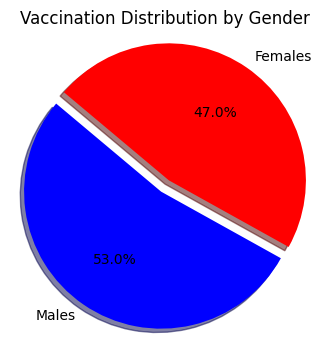

In [18]:
# Summing up the male and female vaccinated data
male_vaccinated = df_vaccine['Male(Individuals Vaccinated)'].sum()
female_vaccinated = df_vaccine['Female(Individuals Vaccinated)'].sum()

# Data for the pie chart
labels = ['Males', 'Females']
sizes = [male_vaccinated, female_vaccinated]
colors = ['blue', 'red']
explode = (0.1, 0)  # Explode the first slice (Males)

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Vaccination Distribution by Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()

Total vaccinated males: 7138698858.0
Total male population: 7418800000


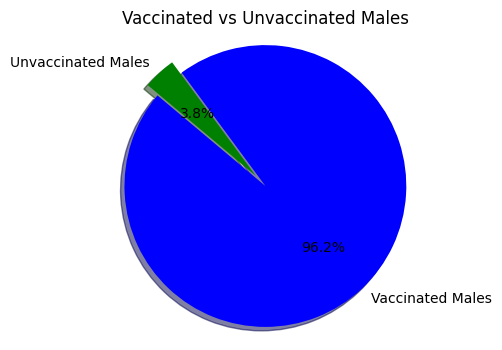

In [42]:
# Sum of vaccinated males
vaccinated_males = df_vaccine['Male(Individuals Vaccinated)'].sum()

# Total male population (742 million)
total_male_population = 7418800000  # India male population in 2021

# Check the range of vaccinated males
print(f"Total vaccinated males: {vaccinated_males}")
print(f"Total male population: {total_male_population}")

# If the sum of vaccinated males is too small, adjust values or check the data
unvaccinated_males = max(0, total_male_population - vaccinated_males)

# Labels and pie chart settings
labels = ['Vaccinated Males', 'Unvaccinated Males']
sizes = [vaccinated_males, unvaccinated_males]
colors = ['blue', 'green']
explode = (0.1, 0)

# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Vaccinated vs Unvaccinated Males')
plt.axis('equal')
plt.show()

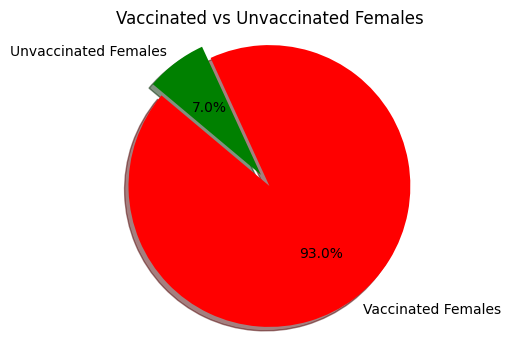

In [43]:
# Sum of vaccinated females
vaccinated_females = df_vaccine['Female(Individuals Vaccinated)'].sum()

# Total female population (in India, around 2021 the female population is about 680 million)
total_female_population = 6800000000  # Total female population in India (estimated for 2021)

# Calculate unvaccinated females
unvaccinated_females = max(0, total_female_population - vaccinated_females)

# Pie chart labels and sizes
labels = ['Vaccinated Females', 'Unvaccinated Females']
sizes = [vaccinated_females, unvaccinated_females]
colors = ['red', 'green']
explode = (0.1, 0)  # Highlight vaccinated females slice

# Create the pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Vaccinated vs Unvaccinated Females')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

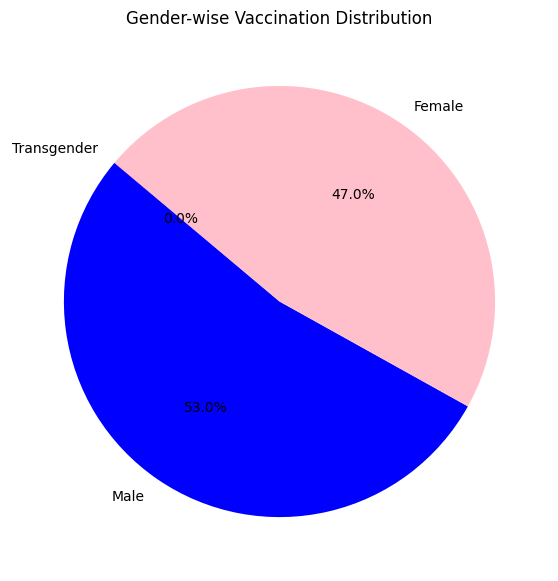

In [47]:
# Remove any rows with missing values for gender vaccination data
df = df_vaccine.dropna(subset=['Male(Individuals Vaccinated)', 'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)'])

# Sum up the total vaccination for each gender
gender_vaccination = {
    'Male': df['Male(Individuals Vaccinated)'].sum(),
    'Female': df['Female(Individuals Vaccinated)'].sum(),
    'Transgender': df['Transgender(Individuals Vaccinated)'].sum()
}

# Create a pie chart for gender-wise vaccination distribution
plt.figure(figsize=(7, 7))
plt.pie(gender_vaccination.values(), labels=gender_vaccination.keys(), autopct='%1.1f%%', startangle=140, colors=['blue', 'pink', 'purple'])
plt.title('Gender-wise Vaccination Distribution')
plt.show()

<ipython-input-57-be1445d6d97b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=latest_cases['Confirmed'], y=latest_cases.index, palette="Reds_r")
<ipython-input-57-be1445d6d97b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=latest_vaccine['Total Doses Administered'], y=latest_vaccine.index, palette="Blues_d")


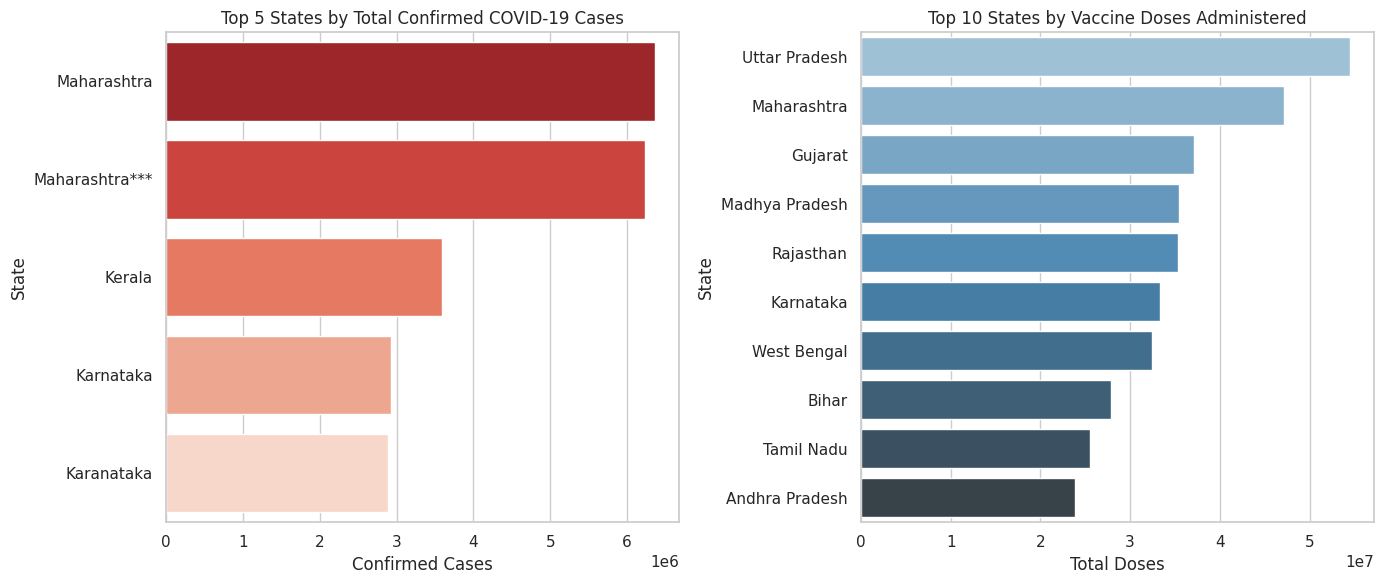

In [57]:
# Get latest confirmed cases by state
latest_cases = (
    df_cases.sort_values('Date')
    .groupby('State/UnionTerritory')
    .last()
    .sort_values('Confirmed', ascending=False)
    .head(5)
)

# Get latest vaccine data by state (excluding total 'India')
latest_vaccine = (
    df_vaccine[df_vaccine['State'] != 'India']
    .sort_values('Updated On')
    .groupby('State')
    .last()
    .sort_values('Total Doses Administered', ascending=False)
    .head(10)
)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Plot 1: Confirmed cases
plt.subplot(1, 2, 1)
sns.barplot(x=latest_cases['Confirmed'], y=latest_cases.index, palette="Reds_r")
plt.title("Top 5 States by Total Confirmed COVID-19 Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("State")

# Plot 2: Vaccine doses
plt.subplot(1, 2, 2)
sns.barplot(x=latest_vaccine['Total Doses Administered'], y=latest_vaccine.index, palette="Blues_d")
plt.title("Top 10 States by Vaccine Doses Administered")
plt.xlabel("Total Doses")
plt.ylabel("State")

plt.tight_layout()
plt.show()


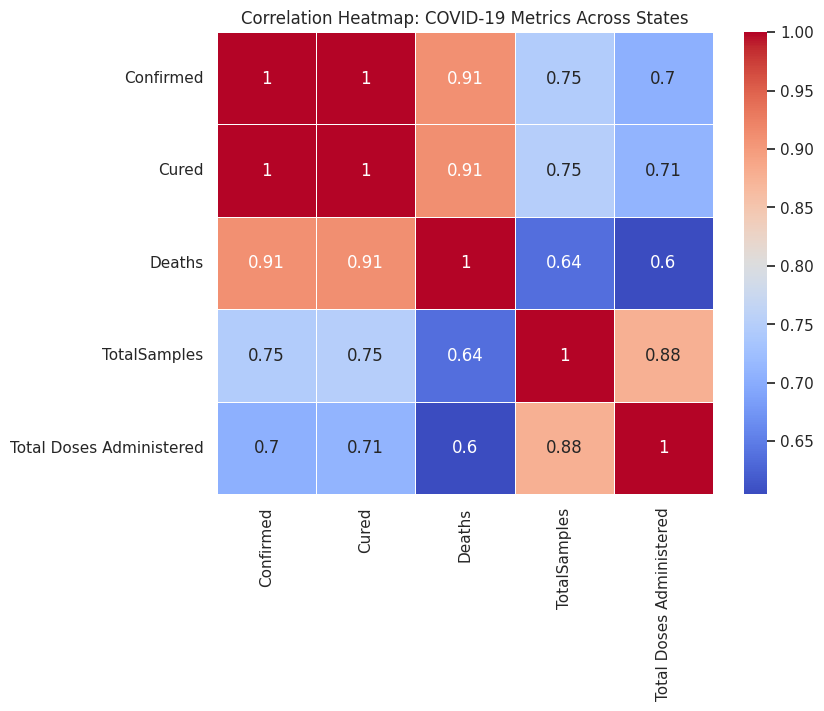

In [61]:
# Merge on index
df_combined = latest_cases.merge(latest_testing, left_index=True, right_index=True, how='inner')
df_combined = df_combined.merge(latest_vaccine, left_index=True, right_index=True, how='inner')

# Compute correlation matrix
correlation_matrix = df_combined.corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap: COVID-19 Metrics Across States")
plt.show()

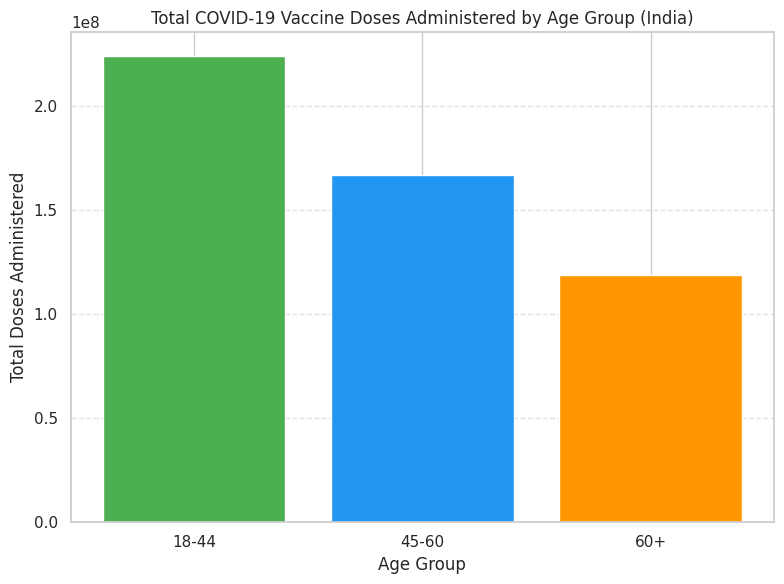

In [64]:
# Filter for latest data for each state (excluding 'India')
latest_vaccine = df_vaccine[df_vaccine['State'] != 'India'].sort_values('Updated On').groupby('State').last()

# Sum total doses per age group
age_group_totals = {
    '18-44': latest_vaccine['18-44 Years (Doses Administered)'].sum(),
    '45-60': latest_vaccine['45-60 Years (Doses Administered)'].sum(),
    '60+': latest_vaccine['60+ Years (Doses Administered)'].sum()
}

# Plotting
plt.figure(figsize=(8,6))
plt.bar(age_group_totals.keys(), age_group_totals.values(), color=['#4caf50', '#2196f3', '#ff9800'])
plt.title("Total COVID-19 Vaccine Doses Administered by Age Group (India)")
plt.xlabel("Age Group")
plt.ylabel("Total Doses Administered")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

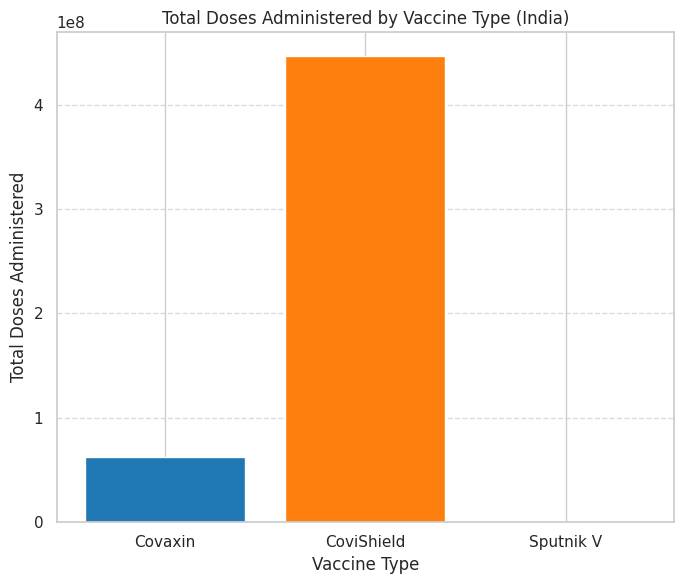

In [65]:
# Sum doses per vaccine type
vaccine_totals = {
    'Covaxin': latest_vaccine[' Covaxin (Doses Administered)'].sum(),
    'CoviShield': latest_vaccine['CoviShield (Doses Administered)'].sum(),
    'Sputnik V': latest_vaccine['Sputnik V (Doses Administered)'].sum()
}

# Plotting
plt.figure(figsize=(7,6))
plt.bar(vaccine_totals.keys(), vaccine_totals.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Total Doses Administered by Vaccine Type (India)")
plt.xlabel("Vaccine Type")
plt.ylabel("Total Doses Administered")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

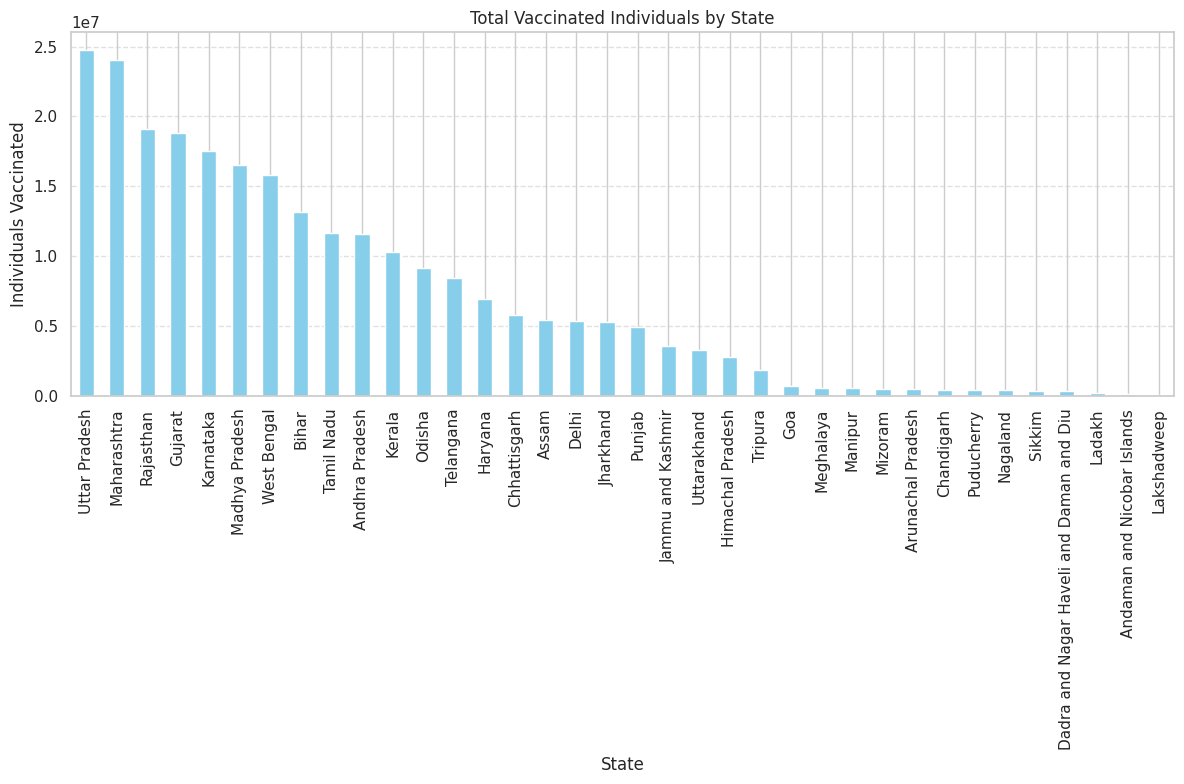

In [66]:
# Sort by total individuals vaccinated
state_vax = latest_vaccine['Total Individuals Vaccinated'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
state_vax.plot(kind='bar', color='skyblue')
plt.title("Total Vaccinated Individuals by State")
plt.ylabel("Individuals Vaccinated")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

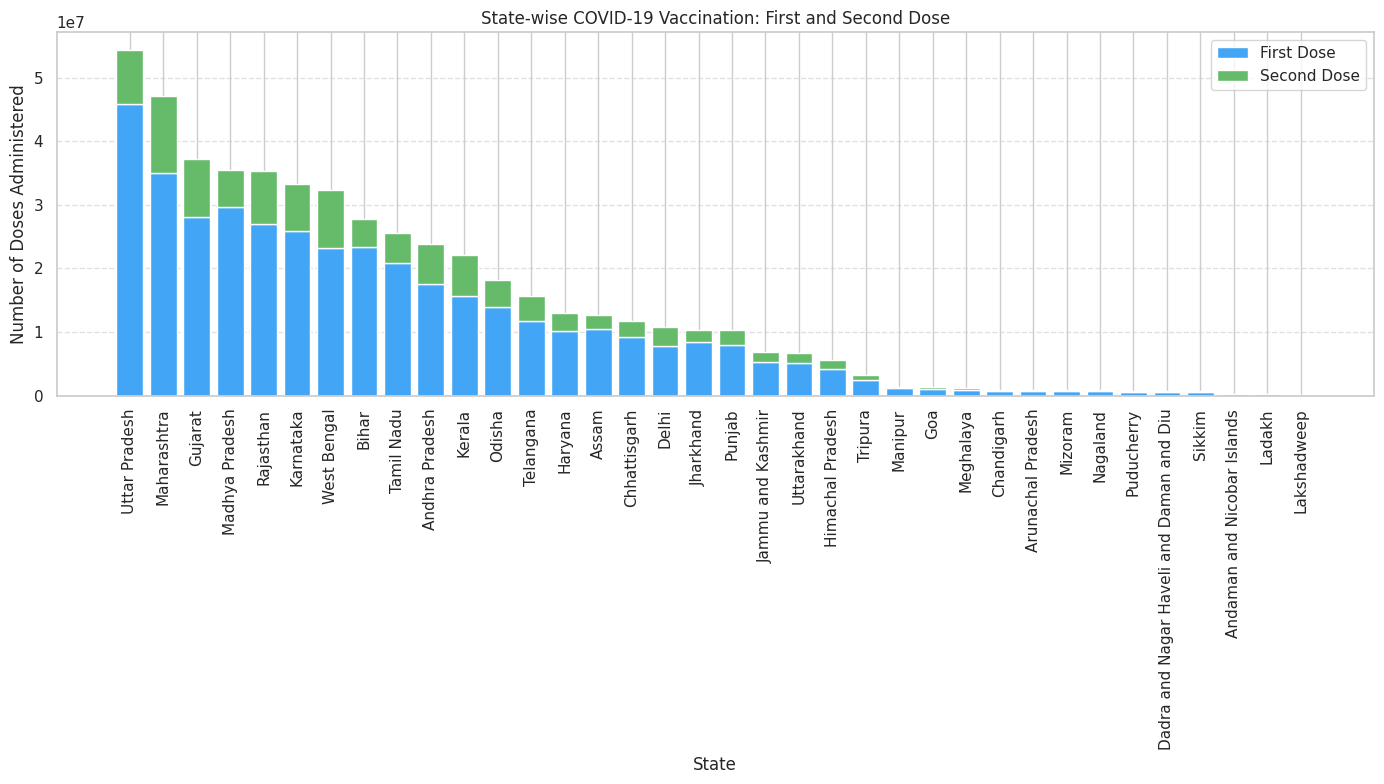

In [67]:
# Extract relevant columns
first_dose = latest_vaccine['First Dose Administered']
second_dose = latest_vaccine['Second Dose Administered']

# Sort states by total vaccinations (for better visualization)
total_doses = first_dose + second_dose
sorted_states = total_doses.sort_values(ascending=False).index

# Plot
plt.figure(figsize=(14, 8))
plt.bar(sorted_states, first_dose[sorted_states], label='First Dose', color='#42a5f5')
plt.bar(sorted_states, second_dose[sorted_states], bottom=first_dose[sorted_states], label='Second Dose', color='#66bb6a')
plt.title("State-wise COVID-19 Vaccination: First and Second Dose")
plt.xlabel("State")
plt.ylabel("Number of Doses Administered")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

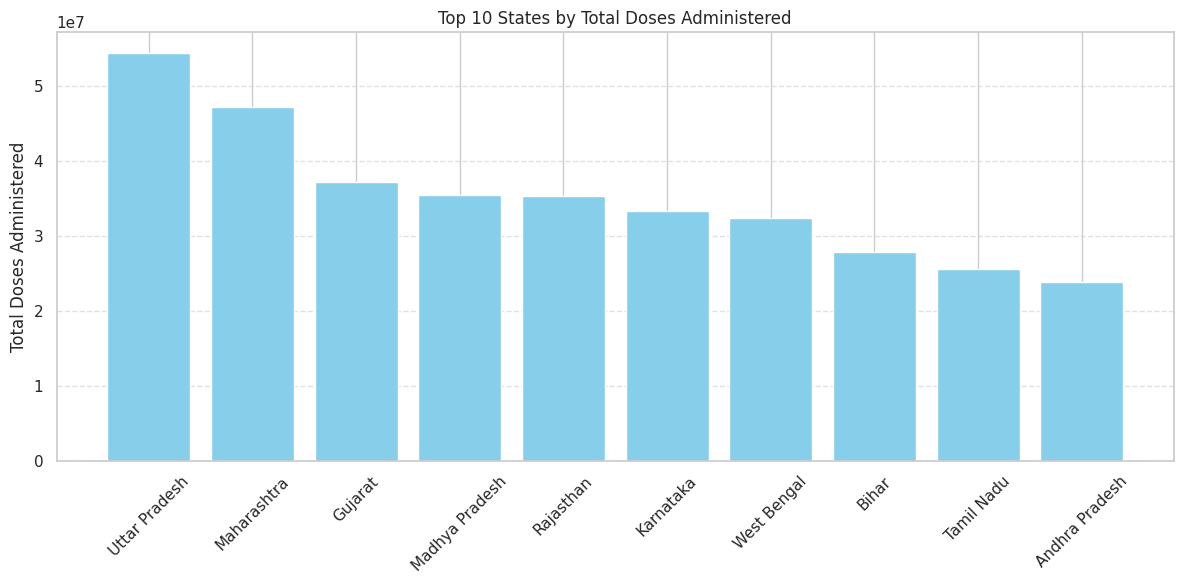

In [71]:
# Get top 10 states by total doses
top10_states = latest_vaccine['Total Doses Administered'].sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top10_states.index, top10_states.values, color='skyblue')
plt.title("Top 10 States by Total Doses Administered")
plt.ylabel("Total Doses Administered")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Columns available: ['Updated On', 'Total Doses Administered', 'Sessions', 'Sites', 'First Dose Administered', 'Second Dose Administered', 'Male (Doses Administered)', 'Female (Doses Administered)', 'Transgender (Doses Administered)', 'Covaxin (Doses Administered)', 'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)', '18-44 Years(Individuals Vaccinated)', '45-60 Years(Individuals Vaccinated)', '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)', 'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)', 'Total Individuals Vaccinated']


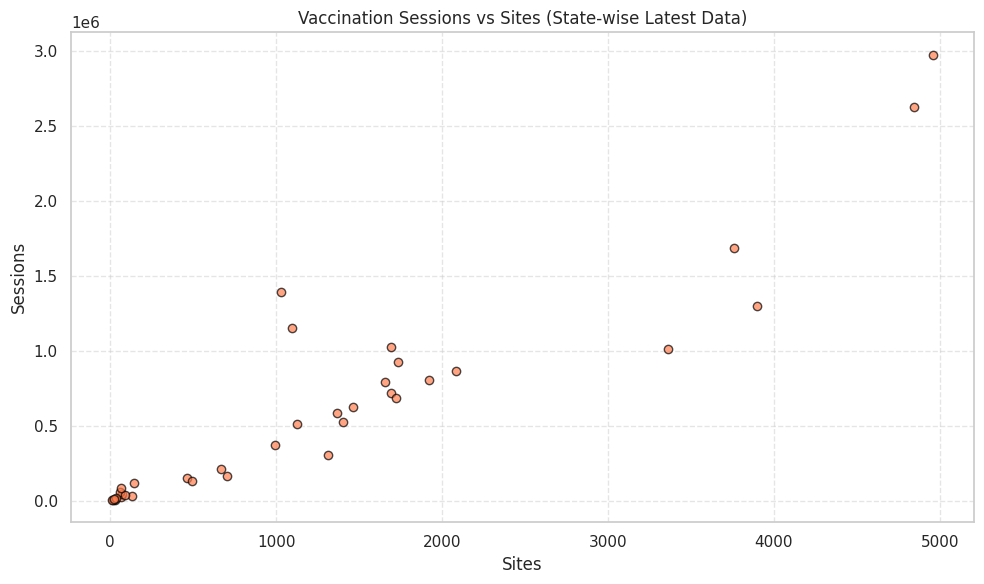

In [73]:
# Strip column names of extra spaces
df_vaccine.columns = df_vaccine.columns.str.strip()

# Convert date column
df_vaccine['Updated On'] = pd.to_datetime(df_vaccine['Updated On'], dayfirst=True, errors='coerce')

# Filter out India and get latest data per state
latest_vaccine = df_vaccine[df_vaccine['State'] != 'India'].sort_values('Updated On').groupby('State').last()

# Check if 'Sites' and 'Sessions' columns exist
print("Columns available:", latest_vaccine.columns.tolist())

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latest_vaccine['Sites'], latest_vaccine['Sessions'], alpha=0.7, color='coral', edgecolor='black')
plt.title("Vaccination Sessions vs Sites (State-wise Latest Data)")
plt.xlabel("Sites")
plt.ylabel("Sessions")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

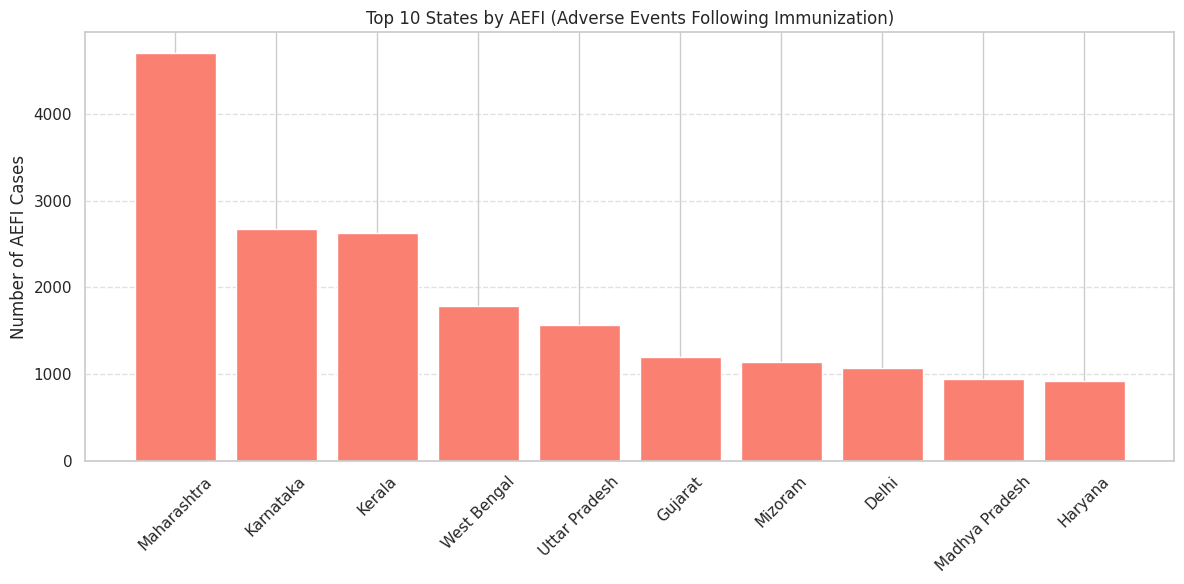

In [74]:
# Drop rows with missing AEFI data
latest_vaccine = latest_vaccine.dropna(subset=['AEFI'])

# Convert AEFI column to numeric (in case it's object type)
latest_vaccine['AEFI'] = pd.to_numeric(latest_vaccine['AEFI'], errors='coerce')

# Sort and select top states by AEFI reported
top_aefi_states = latest_vaccine['AEFI'].sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_aefi_states.index, top_aefi_states.values, color='salmon')
plt.title("Top 10 States by AEFI (Adverse Events Following Immunization)")
plt.ylabel("Number of AEFI Cases")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()